In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv('/content/raw_house_data.csv')
df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,NaN
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN


In [ ]:
df.dtypes

,0
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64


In [ ]:
df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

In [ ]:
# Basic info
df.shape

(5000, 16)

In [ ]:
#Avoid using MLS as a feature in model learning.
# Set MLS as index as reference
df.set_index('MLS', inplace=True)

# Basic info
df.shape

(5000, 15)

In [ ]:
df.head() #first 5 rows

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
MLS,,,,,,,,,,,,,,,
21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [ ]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [ ]:
#In the dataset HOA and fireplace data type is object but the values it contain is numeric so we gonna change that to numeric
df['HOA'] = pd.to_numeric(df['HOA'], errors='coerce')
df['fireplaces'] = pd.to_numeric(df['fireplaces'], errors='coerce')
df.dtypes

,0
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64
sqrt_ft,float64


In [ ]:
missing_all = df.isna().sum() #NaN / None values
zeros = (df == 0).sum(numeric_only=True) #Count zero values only for numeric columns
total_missing = missing_all.add(zeros.reindex(df.columns, fill_value=0)).astype(int) #Combine both (fill missing columns with 0)

total_missing = total_missing.sort_values(ascending=False)
total_missing


,0
HOA,1404
fireplaces,328
garage,191
sqrt_ft,56
lot_acres,45
kitchen_features,33
taxes,22
bathrooms,6
year_built,5
floor_covering,1


In [ ]:
total_missing = total_missing[total_missing > 0]  #Show only columns that have missing or zero values

print("🧾 Missing + Zero Values per Column:")
total_missing

🧾 Missing + Zero Values per Column:


,0
HOA,1404
fireplaces,328
garage,191
sqrt_ft,56
lot_acres,45
kitchen_features,33
taxes,22
bathrooms,6
year_built,5
floor_covering,1


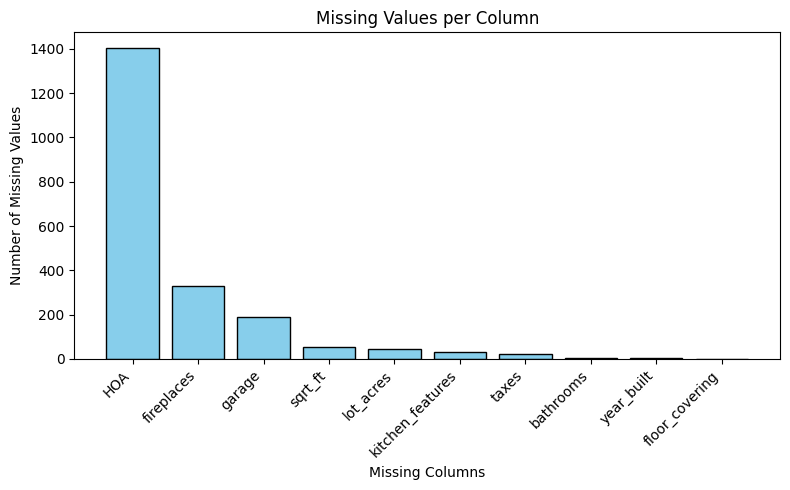

In [ ]:
# We can see the amount of missing values
# Plot the histogram (bar chart)
missing_summary = (
    pd.DataFrame({
        "total_missing": total_missing
    })
    .query("total_missing > 0")
    .sort_values("total_missing", ascending=False)
)

plt.figure(figsize=(8, 5))
plt.bar(missing_summary.index, missing_summary["total_missing"], color='skyblue', edgecolor='black')
plt.title("Missing Values per Column")
plt.xlabel("Missing Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

now it is showing the "fireplace" column also as a missing values. because it is before as object datatypes which means there are empty field but it wont consider as missing value after change that datatype to numeric then the empty space consider as missing now. now we can correctly handle the missing values

In [ ]:
# Fill missing numeric columns with median
for col in ['lot_acres', 'bathrooms', 'sqrt_ft', 'garage', 'HOA', 'fireplaces', 'taxes', 'year_built']:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical columns with label
df['kitchen_features'] = df['kitchen_features'].fillna('Unknown')
df['floor_covering'] = df['floor_covering'].fillna('Unknown')

In [ ]:
df.isnull().sum()

,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,0
taxes,0
year_built,0
bedrooms,0
bathrooms,0
sqrt_ft,0


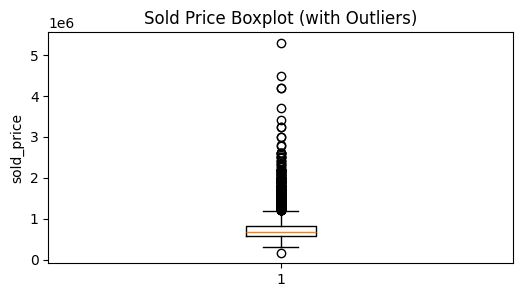

In [ ]:
plt.figure(figsize=(6,3))
plt.boxplot(df['sold_price'], vert=True)
plt.title("Sold Price Boxplot (with Outliers)")
plt.ylabel("sold_price")
plt.show()


Original dataset size: 5000
After removing outliers: 4605


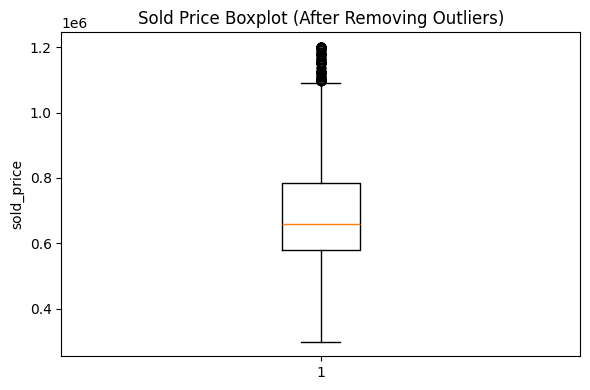

In [ ]:
# outliers
print(f"Original dataset size: {len(df)}")

#Calculate Q1, Q3, and IQR
Q1 = df['sold_price'].quantile(0.25)
Q3 = df['sold_price'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['sold_price'] >= lower_limit) & (df['sold_price'] <= upper_limit)]

print(f"After removing outliers: {len(df_no_outliers)}")

# Boxplot after removing outliers
plt.figure(figsize=(6,4))
plt.boxplot(df_no_outliers['sold_price'], vert=True)
plt.title("Sold Price Boxplot (After Removing Outliers)")
plt.ylabel("sold_price")
plt.tight_layout()
plt.show()

In [ ]:
df_no_outliers.shape

(4605, 15)

In [ ]:
#Feature Engineering
df_no_outliers = df_no_outliers.copy()

#Create price_per_sqft
df_no_outliers.loc[:, 'price_per_sqft'] = df_no_outliers['sold_price'] / df_no_outliers['sqrt_ft']

# Create house_age for all valid year_built values
# Treat missing or invalid year_built values properly
df_no_outliers.loc[:, 'house_age'] = 2025 - df['year_built']

# If house_age is 2025, set it to 0 (no valid year_built)
df_no_outliers.loc[df_no_outliers['year_built'].isna() | (df_no_outliers['year_built'] <= 0), 'house_age'] = 0


In [ ]:
df_no_outliers.describe(include='all')
df_no_outliers.dtypes

,0
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64
sqrt_ft,float64


In [ ]:
df_no_outliers.shape

(4605, 17)

In [ ]:
df_no_outliers.isnull().sum().sort_values(ascending=False)

,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,0
taxes,0
year_built,0
bedrooms,0
bathrooms,0
sqrt_ft,0


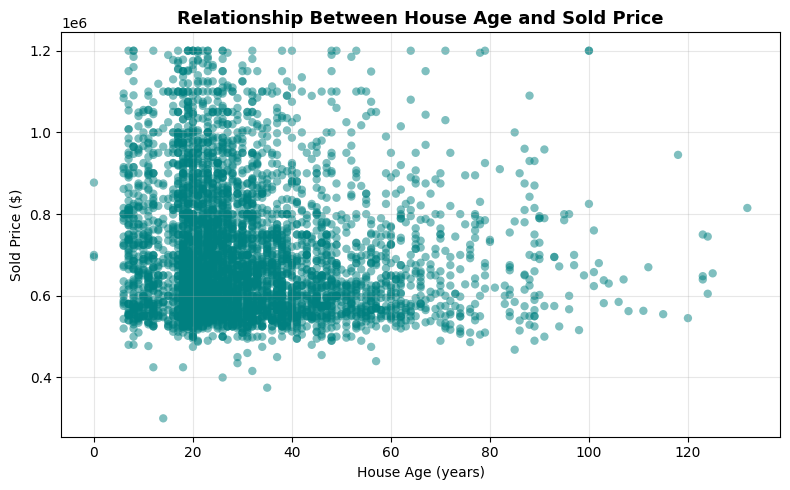

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df_no_outliers['house_age'], df_no_outliers['sold_price'], alpha=0.5, color='teal', edgecolors='none')
plt.title("Relationship Between House Age and Sold Price", fontsize=13, fontweight='bold')
plt.xlabel("House Age (years)")
plt.ylabel("Sold Price ($)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

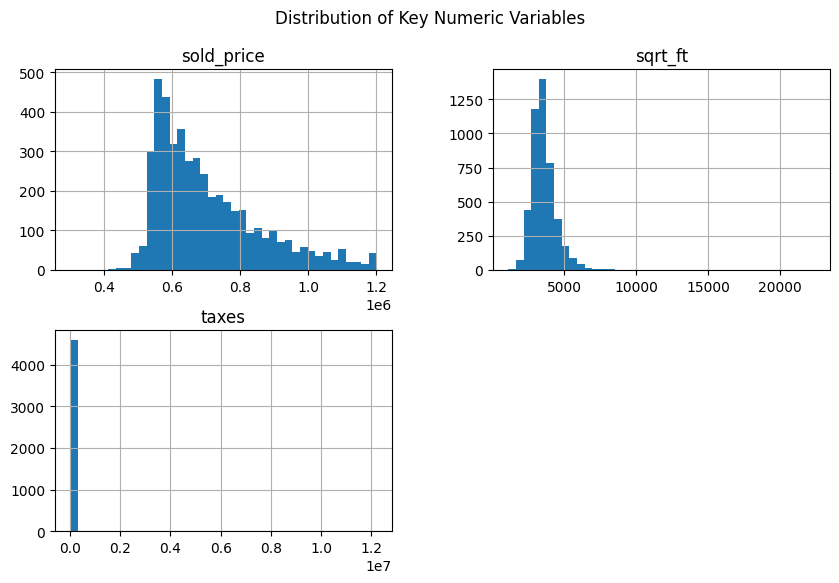

In [ ]:
df_no_outliers[['sold_price','sqrt_ft','taxes']].hist(figsize=(10,6), bins=40)
plt.suptitle("Distribution of Key Numeric Variables")
plt.show()

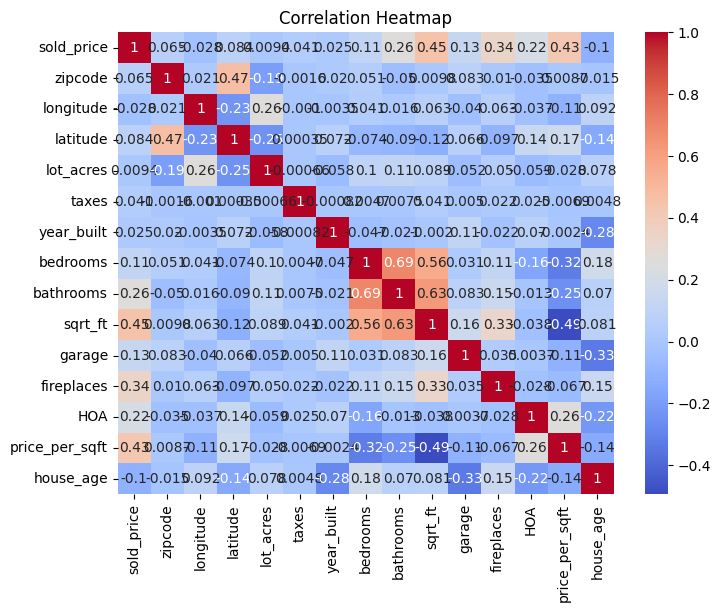

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_no_outliers.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

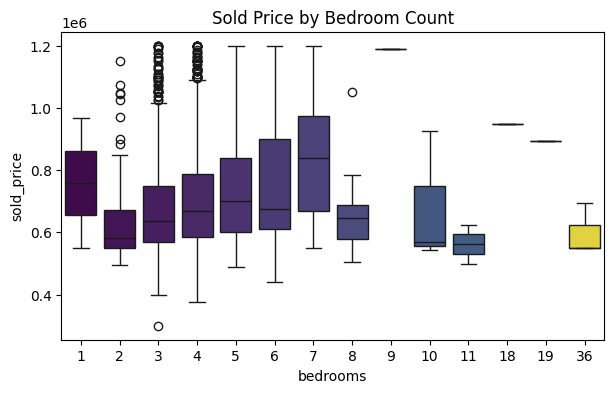

In [ ]:
#Relationship Between Categorical Variables and Target
plt.figure(figsize=(7,4))
sns.boxplot(x='bedrooms', y='sold_price', data=df_no_outliers, hue='bedrooms', palette='viridis', legend=False)
plt.title("Sold Price by Bedroom Count")
plt.show()

The boxplot shows that the number of bedrooms and home sale prices have a non-linear but typically positive relationship

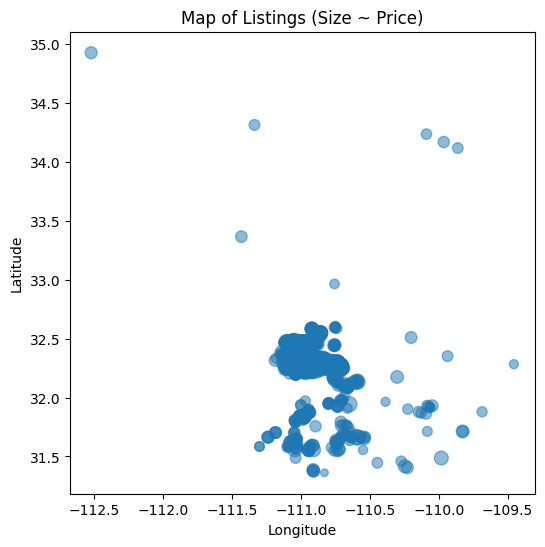

In [ ]:
#Visualize the influence of location.
plt.figure(figsize=(6,6))
plt.scatter(df_no_outliers['longitude'], df_no_outliers['latitude'], s=df_no_outliers['sold_price']/10000, alpha=0.5)
plt.title("Map of Listings (Size ~ Price)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


This map illustrates where houses are located by latitude and longitude, with bubble sizes indicating sale prices.  The majority of properties are grouped around latitudes 32–32.5 and longitudes –111, suggesting that the housing market is centered there.  While smaller bubbles indicate lower-priced properties in outer areas, larger bubbles in this region indicate that higher-priced homes are primarily concentrated in or around central locations.

In [ ]:
df_no_outliers.to_csv("cleaned_house_data.csv", index=False)